In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#loading training set 1
training_1  = pd.read_csv('C:\\Users\\Aishwarya\\notebooks\\CDA\\assignment 2\\BATADAL_dataset03.csv', parse_dates=True, index_col='DATETIME')

In [3]:
del training_1['ATT_FLAG']
training_1

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
2014-06-01 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,31.443146,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392
2014-06-01 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,29.259064,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869
2014-06-01 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,29.200378,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341
2014-06-01 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,29.458397,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440


In [4]:

#attack_csv = pd.read_csv("C:\\Users\\Aishwarya\\notebooks\\CDA\\assignment 2\\BATADAL_test_dataset.csv", parse_dates=True, dayfirst=True, index_col='DATETIME')

In [5]:
##standardises features by removing mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(training_1)
training_1_nom = scaler.transform(training_1)
#print 'mean:',X_train_nom.mean(axis=0) #inspect the mean and the variance
#print 'variance:', X_train_nom.std(axis=0)

In [6]:
#calculating eigen values into percentage
def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray

In [8]:
#calculate pc and eigenvalues
covMat=np.cov(training_1_nom,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
print(eigVects)
num,sortArray = percentage2n(eigVals,0.99)
print( 'Number of principal component:',num  )  
print ('array of eigenvalue:',sortArray )       

[[-0.06534289  0.10626097  0.21082974 ...  0.          0.
   0.        ]
 [ 0.16306272 -0.17823831 -0.058884   ...  0.          0.
   0.        ]
 [ 0.14801496  0.10717083  0.03131044 ...  0.          0.
   0.        ]
 ...
 [-0.11418499 -0.10885121 -0.06005622 ...  0.          0.
   0.        ]
 [ 0.00095746 -0.09325234  0.33556199 ...  0.          0.
   0.        ]
 [ 0.2839072  -0.01225075 -0.25853394 ...  0.          0.
   0.        ]]
Number of principal component: 15
array of eigenvalue: [7.73880163e+00 4.81738519e+00 4.60975503e+00 3.59198956e+00
 2.59716191e+00 2.43398357e+00 1.99933262e+00 1.99388799e+00
 1.53114630e+00 1.16955790e+00 9.23926257e-01 8.84997095e-01
 6.71067185e-01 5.43107776e-01 2.63363186e-01 1.04771232e-01
 3.93624696e-02 2.83612156e-02 2.38967620e-02 1.46386292e-02
 9.12329242e-03 7.42142144e-03 2.42577247e-03 1.91759825e-03
 1.01347477e-03 5.44403134e-04 3.05990281e-04 2.96699289e-04
 1.98771459e-04 1.95000329e-04 1.12080398e-04 6.04850875e-05
 1.04826089e-

In [9]:
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))  
    eigValIndice=np.argsort(eigVals)             
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]    
    n_eigVect=eigVects[:,n_eigValIndice]         
    lowDDataMat=newData*n_eigVect                
    reconMat=(lowDDataMat*n_eigVect.T)  #reconstructed data 
    return n_eigVect,reconMat
    print(n_eigVect)
   

In [10]:
P,training_1_rec = pca(training_1_nom,num)


As mentioned in the paper Network Diagnosing Traffic

In [11]:
lambda1 = sortArray
lambda2 = np.power(sortArray,2)
lambda3 = np.power(sortArray, 3)

fi1 = sum(lambda1[num:])
fi2 = sum(lambda2[num:])
fi3 = sum(lambda3[num:])
h0 = 1-2.0*fi1*fi3 /(3*(fi2**2))
Ca=2.99
threshold = fi1 * np.power(1.0 * Ca * np.sqrt(2* fi2 * (h0 ** 2)) / fi1
                           + 1 + 1.0 * fi2 * h0 * (h0-1) / (fi1 ** 2) , 1.0 / h0)
print( fi1,fi2,fi3,h0,threshold)

0.234646370463219 0.014265590709044717 0.0012518499188459544 0.037733585460721364 1.4742537967195448


percentage of Abnormal data in training data: [[0.00125556]]


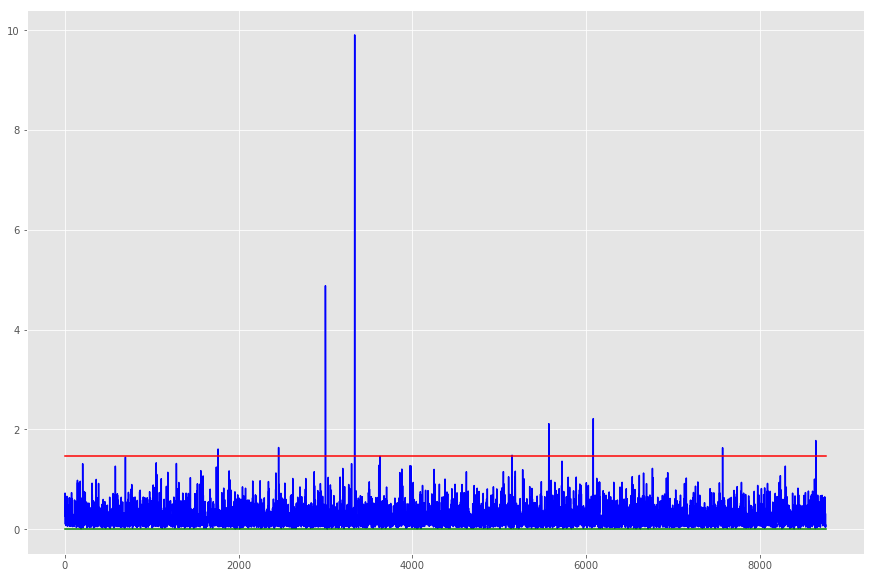

In [12]:
residual_pca1 = training_1_nom -training_1_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[15,10])
plt.figure(figsize=[25,10])
ax.plot(residual_pca,'b')
ax.plot([0,len(residual_pca)],[threshold,threshold],'r')
ax.plot([0,len(residual_pca)],[0.009,0.009],'g')
print ('percentage of Abnormal data in training data:', 1.0 * sum(residual_pca>threshold)/len(residual_pca))

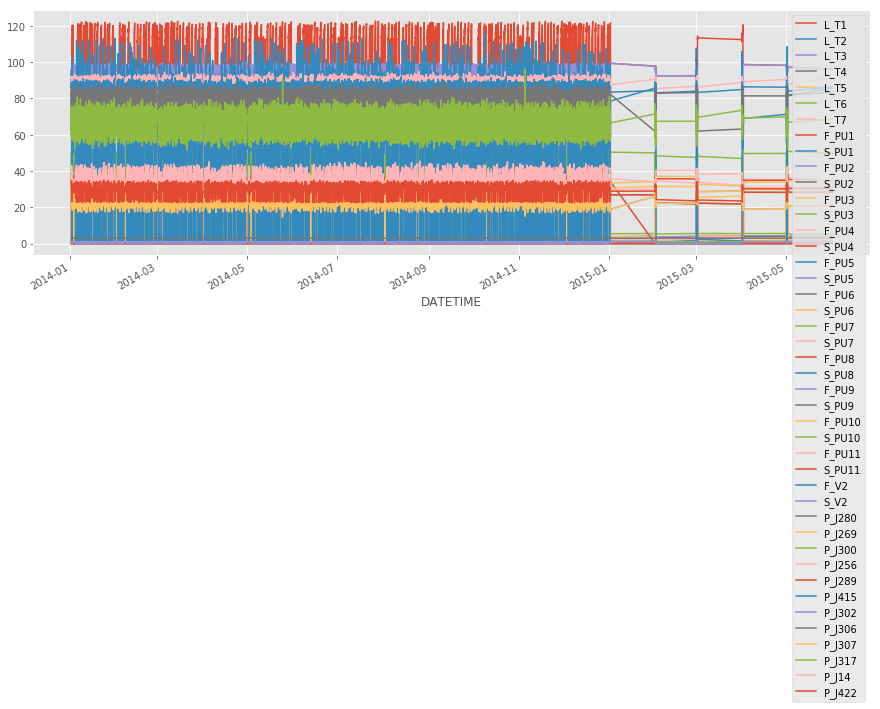

In [13]:
training_1.plot(figsize=(15,5))
